# Assignment - Cross Validation & Hyperparameter Tuning

In this assignment, you are going to measure the performance of the model you created with the Titanic dataset in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

* Evaluate your model's performance with cross validation and using different metrics.
* Determine the model with the most appropriate parameters by hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
titanic = pd.read_csv("titanic2.csv")
df = titanic.copy()

In [2]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [3]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [4]:
from sklearn.model_selection import cross_validate, cross_val_score

model = LogisticRegression()

cv = cross_validate(estimator=model, X=X, y=y, cv=5, return_train_score=True,
                    scoring=['accuracy', 'precision', 'r2'])

In [5]:
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}\n'.format(cv['train_precision'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))

Train Set Mean Accuracy  : 0.81  
Train Set Mean R-square  : 0.19  
Train Set Mean Precision : 0.78

Test Set Mean Accuracy   : 0.80  
Test Set Mean R-square   : 0.16  
Test Set Mean Precision  : 0.77  


In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [1, 10, 100, 1000, 10000],
              "penalty": ['l1', 'l2']
             }

grid_cv = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
grid_cv.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2']})

In [7]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
1,l2,1,0.800920
5,l2,100,0.800920
3,l2,10,0.798673
7,l2,1000,0.797550
9,l2,10000,0.795302
0,l1,1,NaN
2,l1,10,NaN
4,l1,100,NaN
6,l1,1000,NaN
8,l1,10000,NaN


In [8]:
print("The best parameters for our model is ", grid_cv.best_params_)
print("Best score: {:.2f}".format(grid_cv.best_score_))

The best parameters for our model is  {'C': 1, 'penalty': 'l2'}
Best score: 0.80


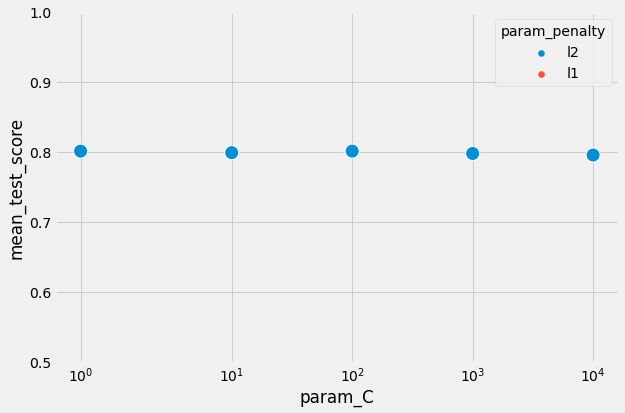

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df, s=200)
plt.xscale('symlog')
plt.ylim((0.5,1))

plt.show()